In [1]:
import numpy as np
import matplotlib.pyplot as plt
from simpleGenerator import Croupier

Импортируем класс Croupier, который отвечает за генерацию данных и создадим экземпляр класса с заданными значениями вероятности для нечестного кубика, а так же вероятности перехода с честного кубика на нечестный и на себя самого, и вероятности перехода с нечестного кубика на себя и на честный. Проверим что получаем выпавшие знаечение кубика, а так же метку кубика

In [3]:
casino = Croupier()
for i in range(10):
    print(casino())

(6, 'F')
(4, 'F')
(6, 'F')
(2, 'F')
(5, 'F')
(3, 'F')
(6, 'F')
(6, 'U')
(4, 'U')
(6, 'U')


Сгенерируем датасеты размером 1 000, 10 000 и 100 000

In [4]:
dataset300 = []
dataset300Labels = []

casino = Croupier()

for i in range(300):
    data, label = casino()
    dataset300.append(data)
    dataset300Labels.append(label)

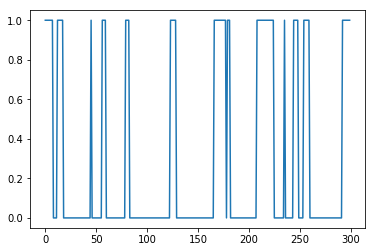

In [5]:
lab = [0 if l =='F' else 1 for l in dataset300Labels ]
plt.plot(lab)

Определим базовый класс алгоритма

In [7]:
class baseAlgo():
    def __init__(self, data):
        self.data = data
        self.L = len(data)
        
        self.states = ['F','U'] # F for Fair state, U for Unfair state
        self.transitionsProbability = {
            'F': np.array([0.95,0.05]), # to F, to U
            'U': np.array([0.1,0.9]) # to F, to U
        }
        
        self.startProbability = {
            'F': 2/3,
            'U': 1/3
        }
        
        self.diceValues = [1,2,3,4,5,6]
        self.diceValueProbability = {
            'F': [1/6 for i in range(6)],
            'U': [.1,.1,.1,.1,.1,.5]
        }

In [35]:
class algorithmViterbi(baseAlgo):
    def __init__(self, data):
        baseAlgo.__init__(self, data)
        
        self.v = []
        self.ptr = []
        
        self.path = None
        self.probability = None
        
        
    def step(self,index):
        self.v.append([])
        for state in self.states:
            observedProbability = self.diceValueProbability[state][data[index]]
            probability = observedProbability*np.max( self.v[index-1] * self.transitionsProbability[state])
            ptr = 'F' if np.argmax(self.v[index-1] * self.transitionsProbability[state]) == 0 else 'U'
            self.v[-1].append(probability)
            self.ptr[-1].append(ptr)
            
    
    def initialization(self):
        self.v.append([])
        self.ptr.append(['F','U'])
        for state in self.states:
            observedProbability = self.diceValueProbability[state][data[0]]
            probability = observedProbability*self.startProbability[state]
            self.v[0].append(probability)
        
        for i in range(1, self.L + 1): 
            self.step(i)
        
        self.probability = max(self.v[-1])
        self.path = [ 'F' if np.argmax(self.v[-1]) == 0 else 'U' ]
        
        for i in range(self.L,0,-1):
            self.path.append(self.ptr[0 if self.path[-1] == 'F' else 1])
        
        self.path = self.path[::-1]
    
    def probability(self):
        if self.probability != None: return self.probability
    
    def __call__(self):
        if self.path == None: self.initialization()
        return self.path
        

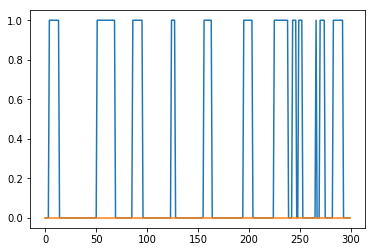

In [39]:
hackCasinoViterbi = algorithmViterbi(dataset300, [0.95,0.05],[0.1,0.9],[0.1,0.1,0.1,0.1,0.1,0.5])
result = hackCasinoViterbi()
# hackCasinoViterbi.probability()
# print(result)
res = [0 if l =='F' else 1 for l in result]
res.append(0)
plt.plot(lab)
plt.plot(res)